In [171]:
# imported nana tanan ayaw na pag import pisti yawa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [172]:
#3 data exploration

file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

#info
summary_info = data[['main.aqi', 'components.co',  'components.no', 'components.o3', 'components.so2','components.pm2_5', 'components.pm10', 'components.nh3', 'city_name']].info()

#describe
summary_stats = data[['main.aqi', 'components.co',  'components.no', 'components.o3', 'components.so2','components.pm2_5', 'components.pm10', 'components.nh3', 'city_name']].describe()

print(summary_stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34219 entries, 0 to 34218
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   main.aqi          34219 non-null  float64
 1   components.co     34219 non-null  float64
 2   components.no     34219 non-null  float64
 3   components.o3     34219 non-null  float64
 4   components.so2    34219 non-null  float64
 5   components.pm2_5  34219 non-null  float64
 6   components.pm10   34219 non-null  float64
 7   components.nh3    34219 non-null  float64
 8   city_name         34219 non-null  object 
dtypes: float64(8), object(1)
memory usage: 2.3+ MB
           main.aqi  components.co  components.no  components.o3  \
count  34219.000000   34219.000000   34219.000000   34219.000000   
mean       1.637394     489.998768       1.238858      28.759228   
std        1.026660     443.169741       6.219306      27.765025   
min        1.000000     136.850000       0.000000  

In [173]:
from scipy import stats


file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

# columns for analysis
numerical_columns = ['main.aqi', 'components.co', 'components.no', 'components.o3',
                     'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']


statistics_numpy = {}

# basic descriptive statistics
for column in numerical_columns:
    column_data = data[column].dropna()
    stats_dict = {
        'mean': np.mean(column_data),
        'median': np.median(column_data),
        'mode': stats.mode(column_data),
        'std_dev': np.std(column_data, ddof=1),
        'variance': np.var(column_data, ddof=1),
        'min': np.min(column_data),
        'max': np.max(column_data),
        'range': np.ptp(column_data),
        '25th_percentile': np.percentile(column_data, 25),
        '50th_percentile': np.percentile(column_data, 50),
        '75th_percentile': np.percentile(column_data, 75)
    }
    statistics_numpy[column] = stats_dict

# better viewing
statistics_numpy_df = pd.DataFrame(statistics_numpy).T


print(statistics_numpy_df)

                        mean  median           mode     std_dev  \
main.aqi            1.637394     1.0   (1.0, 21471)     1.02666   
components.co     489.998768  333.79  (267.03, 788)  443.169741   
components.no       1.238858    0.05    (0.0, 8421)    6.219306   
components.o3      28.759228   23.25     (0.0, 744)   27.765025   
components.so2      4.233641    1.42    (0.24, 277)    7.946603   
components.pm2_5   14.707393    5.59     (0.5, 310)   25.309414   
components.pm10    17.830166    7.28     (2.15, 60)    29.79942   
components.nh3      4.416526    1.95     (0.0, 787)    6.533856   

                       variance     min      max   range 25th_percentile  \
main.aqi                1.05403     1.0      5.0     4.0             1.0   
components.co     196399.419776  136.85  5126.95  4990.1          273.71   
components.no         38.679773     0.0   126.96  126.96            0.01   
components.o3        770.896618     0.0   343.32  343.32            11.8   
components.so2  

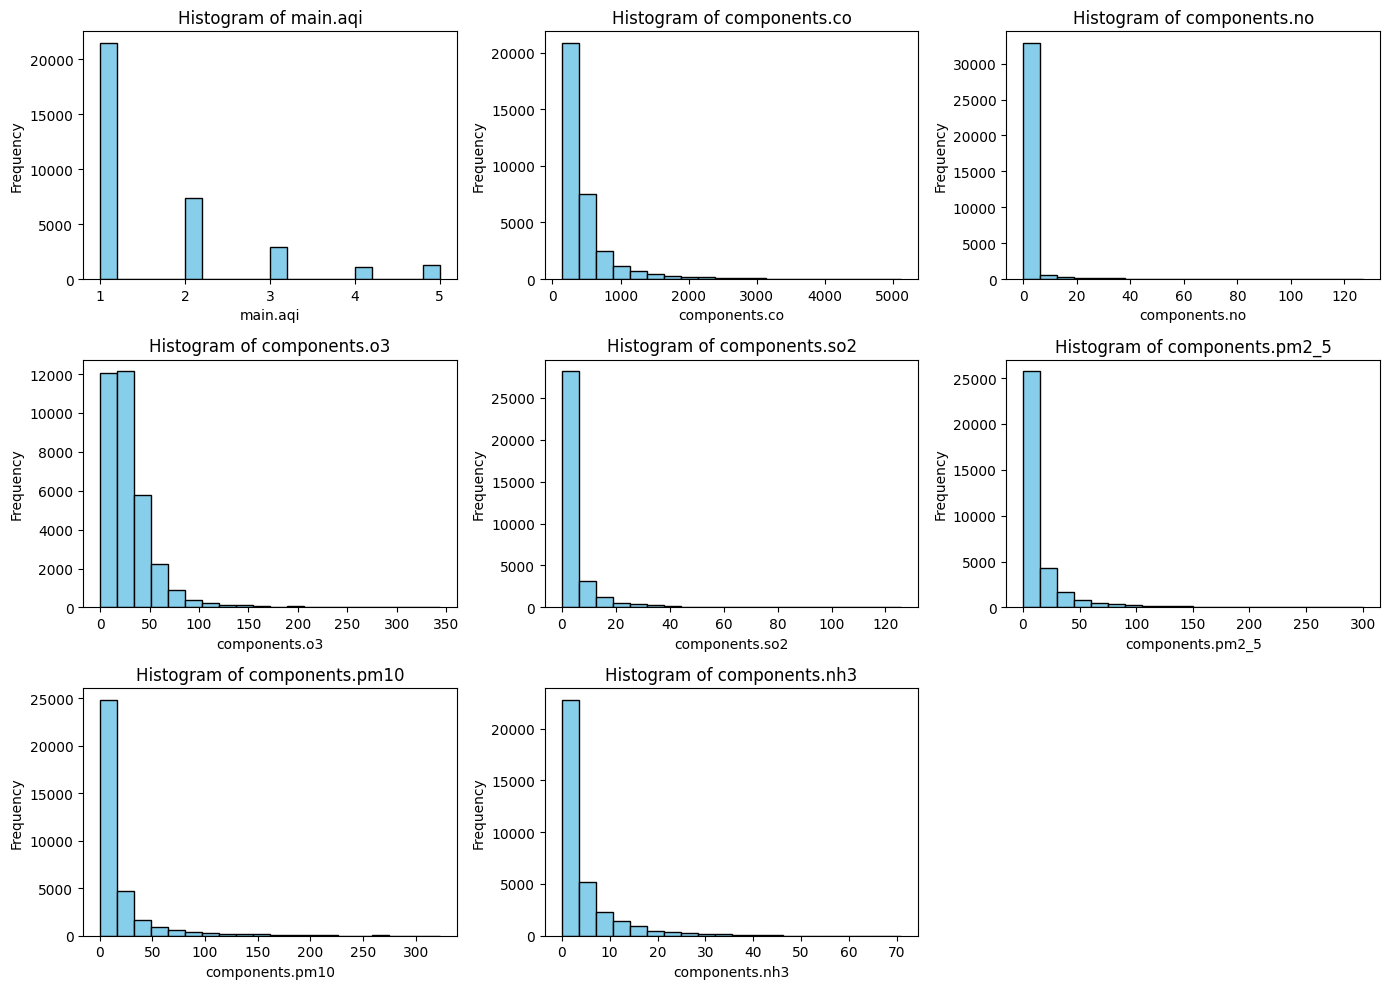

In [174]:
#Visual Presentation Histogram
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i) 
    plt.hist(data[column].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

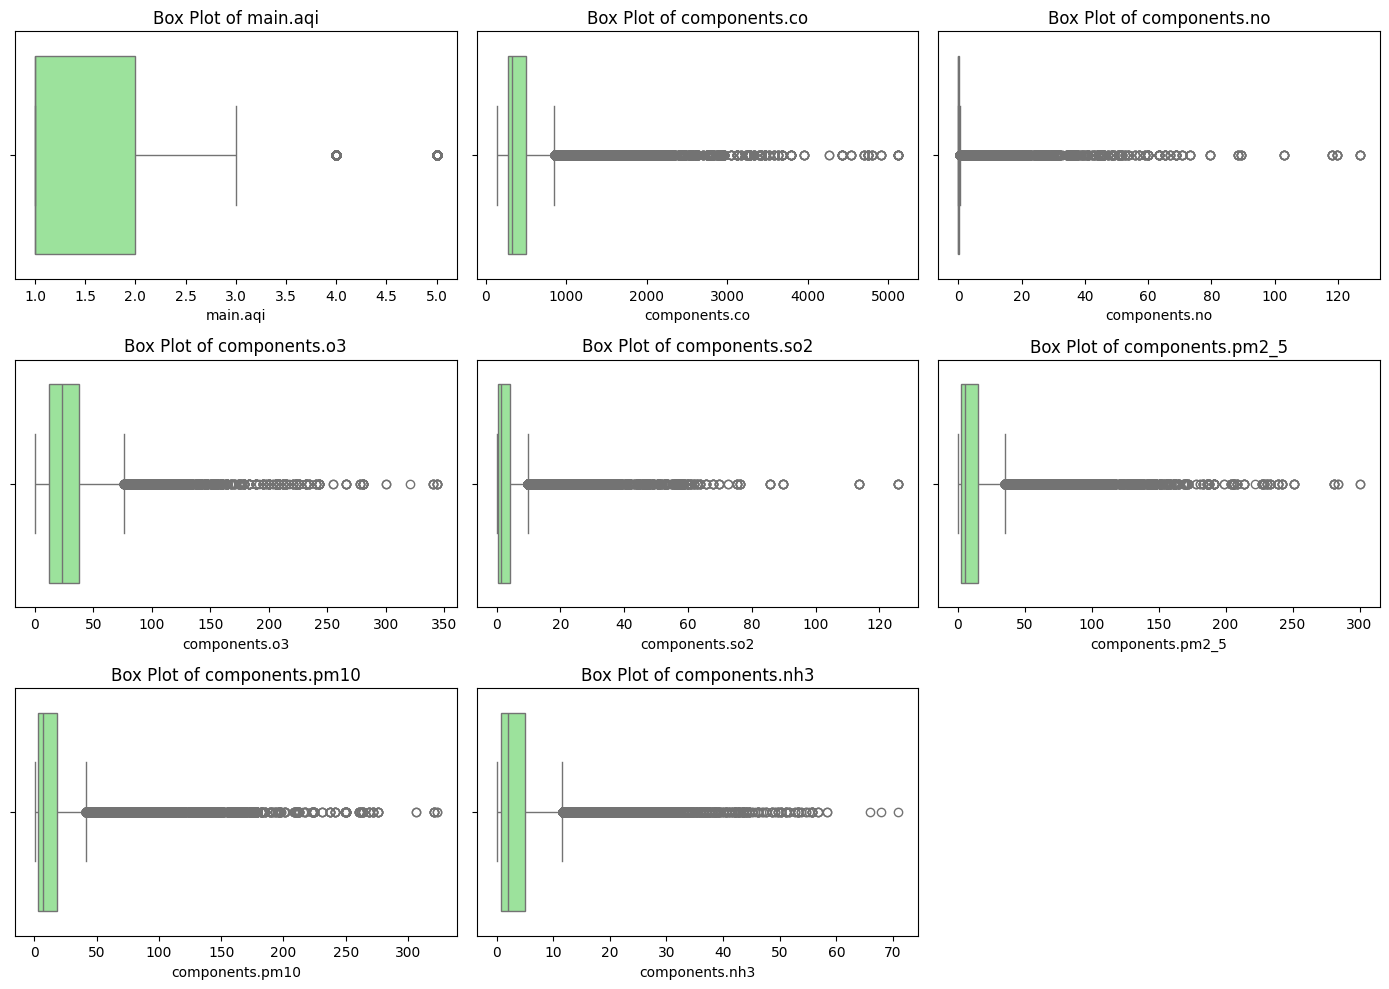

In [175]:
#Visual Presentation Boxplot
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column].dropna(), color='lightgreen')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

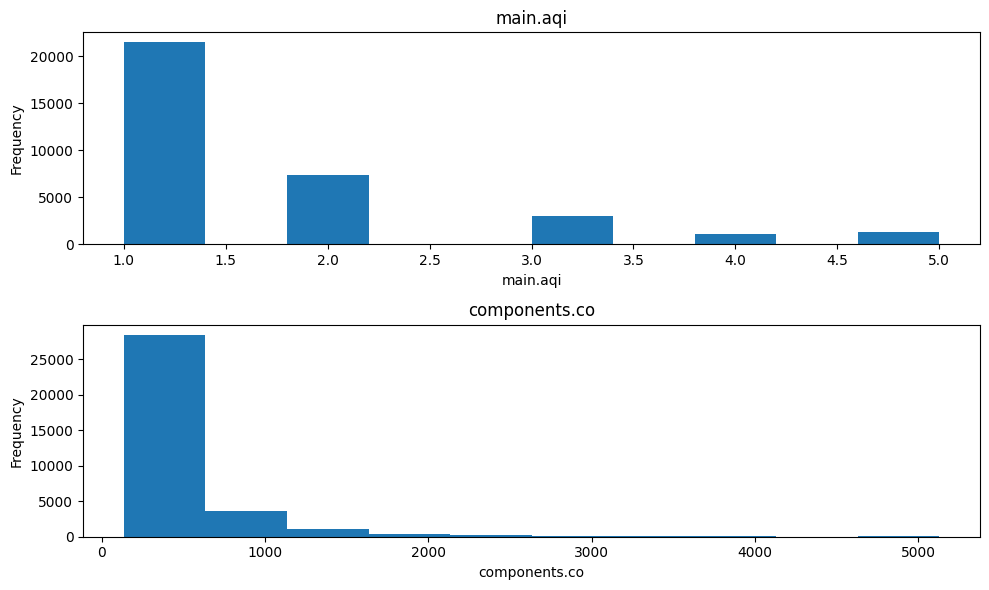

In [176]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '202408_CombinedData.csv'
data = pd.read_csv(file_path)

df = pd.DataFrame(data)


columns_to_plot = ['main.aqi', 'components.co']

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

for i, col in enumerate(columns_to_plot):
    df[col].plot.hist(ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

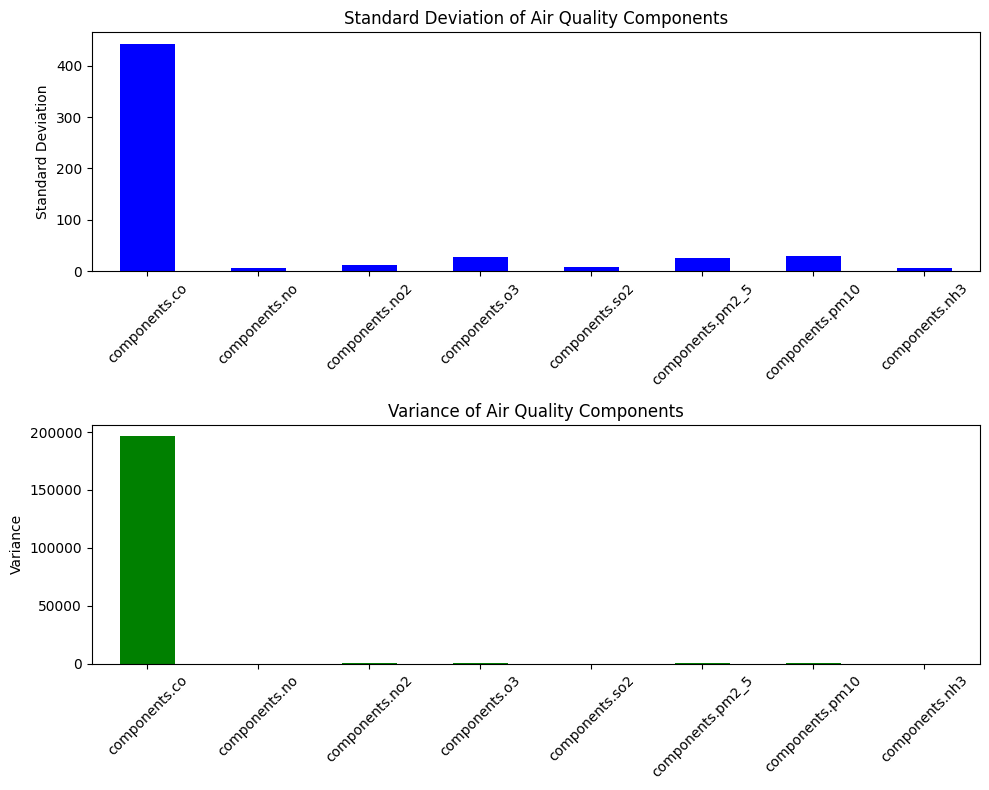

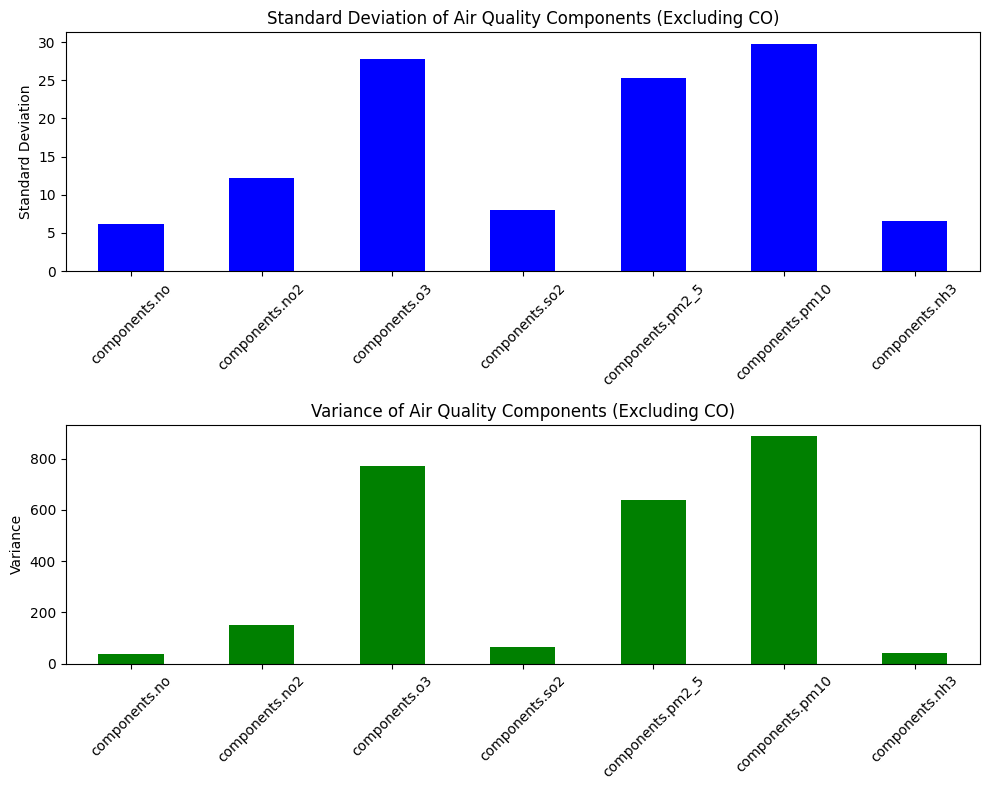

In [177]:
#FILE PATH
file_path = '202408_CombinedData.csv' 
data = pd.read_csv(file_path)

columns_to_analyze = ['components.co', 'components.no', 'components.no2', 'components.o3', 
                      'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

std_devs = data[columns_to_analyze].std()
variances = data[columns_to_analyze].var()

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

std_devs.plot.bar(ax=axes[0], color='blue')
axes[0].set_title('Standard Deviation of Air Quality Components')
axes[0].set_ylabel('Standard Deviation')
axes[0].tick_params(axis='x', rotation=45)

variances.plot.bar(ax=axes[1], color='green')
axes[1].set_title('Variance of Air Quality Components')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


file_path = '202408_CombinedData.csv'  
data = pd.read_csv(file_path)

columns_to_analyze = ['components.no', 'components.no2', 'components.o3', 
                      'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

std_devs = data[columns_to_analyze].std()
variances = data[columns_to_analyze].var()

fig, axes = plt.subplots(2, 1, figsize=(10, 8))

std_devs.plot.bar(ax=axes[0], color='blue')
axes[0].set_title('Standard Deviation of Air Quality Components (Excluding CO)')
axes[0].set_ylabel('Standard Deviation')
axes[0].tick_params(axis='x', rotation=45)

variances.plot.bar(ax=axes[1], color='green')
axes[1].set_title('Variance of Air Quality Components (Excluding CO)')
axes[1].set_ylabel('Variance')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



What are Spikes?
In the context of air quality, a "spike" refers to a sudden increase in the concentration of a specific pollutant that exceeds normal levels. These spikes often indicate an event where pollution levels are unusually high, which can be attributed to specific sources or activities (e.g., industrial emissions, traffic congestion, etc.).

Formula for Identifying Spikes
To identify spikes, we use statistical thresholds based on the mean and standard deviation of the pollutant concentrations over time. The logic is that a value significantly above the average is considered a spike.

The formula for detecting spikes is:


Where:
- μ is the mean value of the pollutant's concentration.
- σ is the standard deviation of the pollutant's concentration.
- 2σ is chosen as a common threshold to capture values that are significantly above the average. You can adjust this factor (e.g., 1σ, 3σ) depending on the sensitivity you want in detecting spikes.

Steps to Identify Spikes:
1. Calculate the Mean (𝜇): Compute the average concentration for each pollutant over the dataset. The mean gives us the central tendency or normal level of each pollutant.
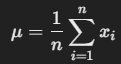

2. Calculate the Standard Deviation (𝜎): The standard deviation measures the amount of variation or dispersion in the pollutant concentration data.
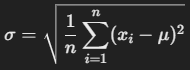

3. Set the Spike Threshold: Using the formula 𝜇+2𝜎, identify the threshold. Any value of the pollutant concentration that exceeds this threshold is considered a spike.

For example, if the mean concentration for NO2 is 25 μg/m³ and the standard deviation is 5 μg/m³, the threshold would be:


4. Identify Spikes in the Data: Compare each data point to the threshold for its corresponding pollutant. If the pollutant concentration exceeds the threshold, it is flagged as a spike.



Visualizing Frequent Spikes:
Once spikes are detected, you can count how often each pollutant exceeds its threshold. This helps identify which pollutants experience frequent spikes, indicating potential air quality issues that may be linked to specific sources (e.g., traffic, industrial plants).

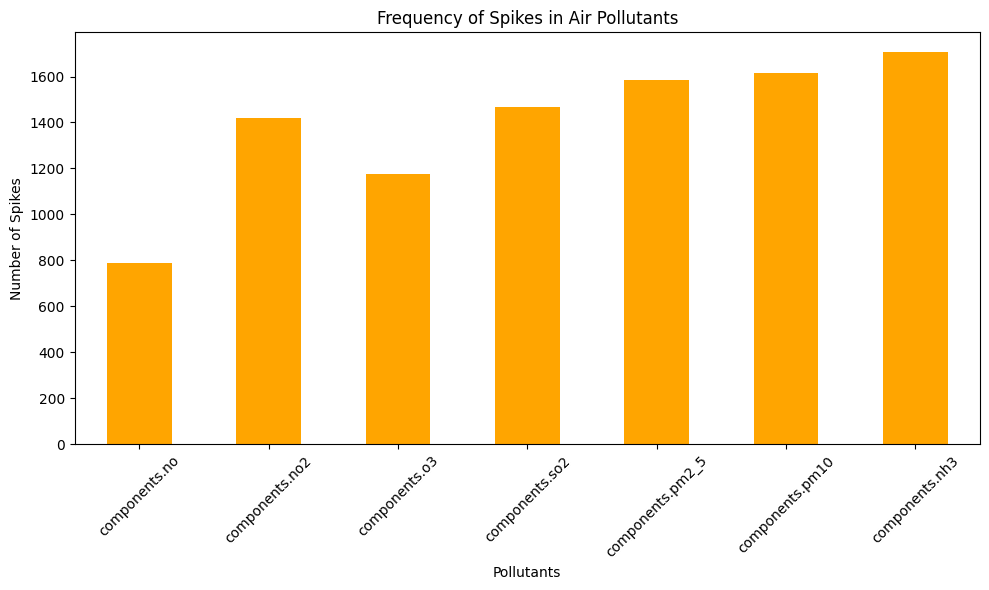

,datetime,city_name,coord.lon,coord.lat,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
1,2024-08-01 00:00:02+08:00,Angeles City,120.5833,15.1500,0.04,20.56,9.21,6.02,28.39,33.32,28.88
2,2024-08-01 00:00:03+08:00,Antipolo,121.1900,15.6181,0.24,30.85,4.83,6.56,45.25,50.09,25.84
8,2024-08-01 00:00:14+08:00,Balanga,120.5361,14.6761,5.20,28.45,0.10,8.94,19.93,23.36,18.49
12,2024-08-01 00:00:23+08:00,Baybay,123.7135,13.4083,0.00,1.22,45.42,22.89,17.14,17.44,0.00
15,2024-08-01 00:00:28+08:00,Biñan,121.0807,14.3427,34.42,15.42,0.00,12.64,34.14,45.69,8.74
20,2024-08-01 00:00:38+08:00,Cabanatuan City,120.9667,15.4833,2.99,26.05,0.27,5.01,71.40,75.31,16.97
21,2024-08-01 00:00:40+08:00,Cabuyao,121.1262,14.2726,34.42,15.42,0.00,12.64,34.14,45.69,8.74
25,2024-08-01 00:00:48+08:00,Calamba,121.1653,14.2117,34.42,15.42,0.00,12.64,34.14,45.69,8.74
32,2024-08-01 00:01:03+08:00,Carmona,121.0576,14.3132,34.42,15.42,0.00,12.64,34.14,45.69,8.74
34,2024-08-01 00:01:07+08:00,Cauayan,121.7725,16.9347,0.13,11.14,4.16,1.52,16.76,19.35,21.79


In [178]:
file_path = '202408_CombinedData.csv'  
data = pd.read_csv(file_path)

# Columns to analyze
pollutants = ['components.no', 'components.no2', 'components.o3', 
              'components.so2', 'components.pm2_5', 'components.pm10', 'components.nh3']

# Calculate the mean and standard deviation for each pollutant
mean_vals = data[pollutants].mean()
std_vals = data[pollutants].std()

# Set threshold for spikes: 2 standard deviations above the mean
thresholds = mean_vals + 2 * std_vals

# Identify rows where any pollutant exceeds its spike threshold
spikes = data[(data[pollutants] > thresholds).any(axis=1)]

# Count how often each pollutant spikes to assess 'frequent' pollutants
spike_counts = (spikes[pollutants] > thresholds).sum()

# Plot spike counts to visualize which pollutants spike more frequently
spike_counts.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Frequency of Spikes in Air Pollutants')
plt.ylabel('Number of Spikes')
plt.xlabel('Pollutants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display rows where spikes occur to help identify sources
spikes_with_coordinates = spikes[['datetime', 'city_name', 'coord.lon', 'coord.lat'] + pollutants]
display(spikes_with_coordinates.head(10))




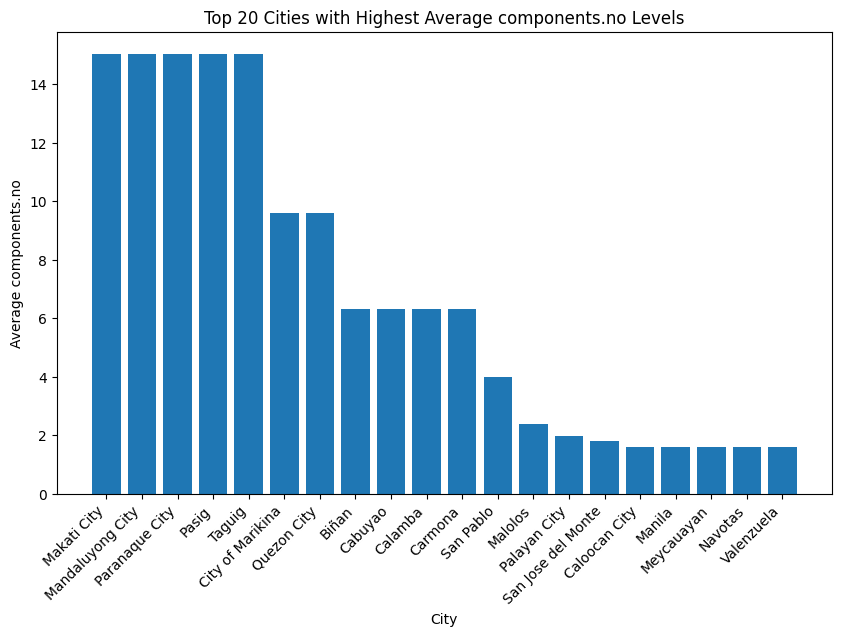

In [179]:

# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
df = pd.DataFrame(data)

pollutant_NO = 'components.no'
df['datetime'] = pd.to_datetime(df['datetime'].str.strip('"'))

# Group data by city and calculate the average pollutant level
average_NO = df.groupby('city_name')[pollutant_NO].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_NO.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_NO} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

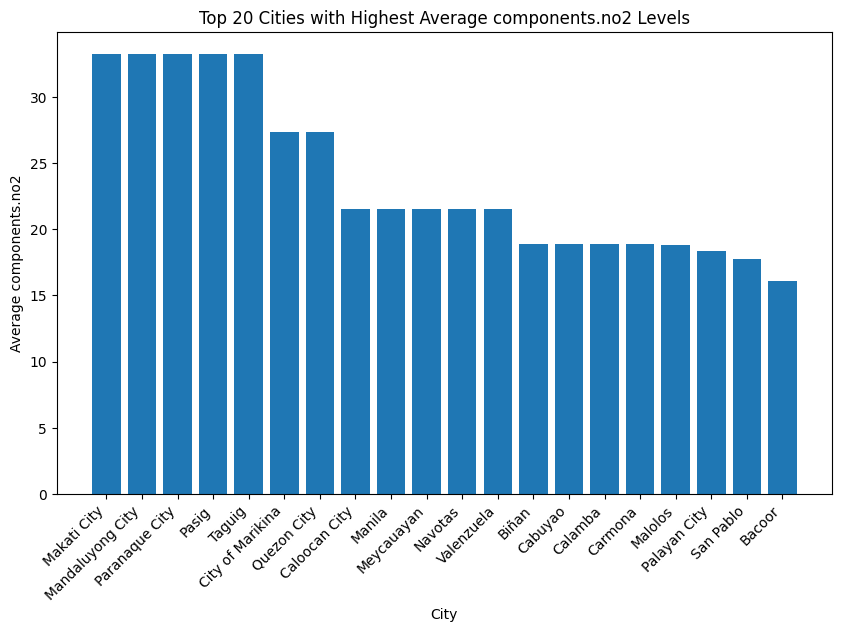

In [180]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_NO2 = 'components.no2'

# Group data by city and calculate the average pollutant level
average_NO2 = df.groupby('city_name')[pollutant_NO2].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_NO2.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NO2}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_NO2} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

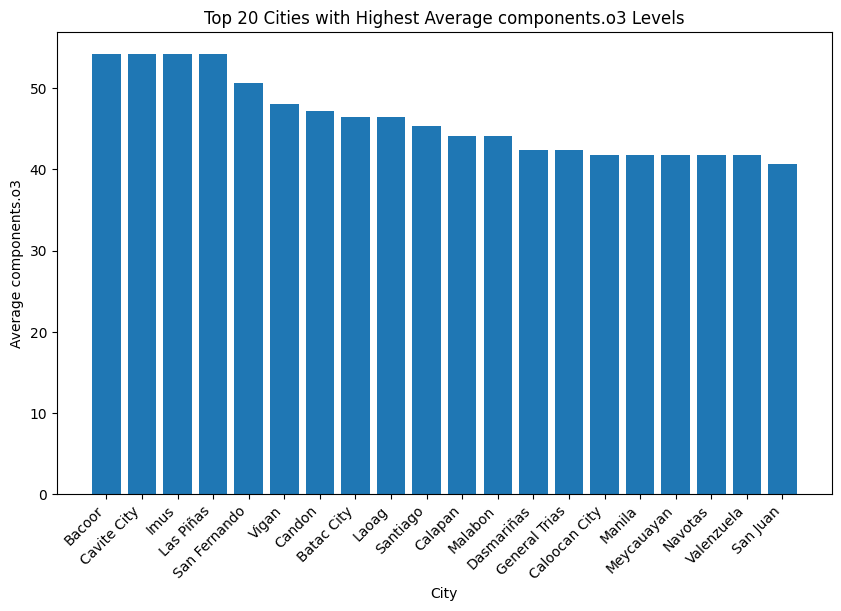

In [181]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_O3 = 'components.o3'

# Group data by city and calculate the average pollutant level
average_O3 = df.groupby('city_name')[pollutant_O3].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_O3.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_O3}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_O3} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

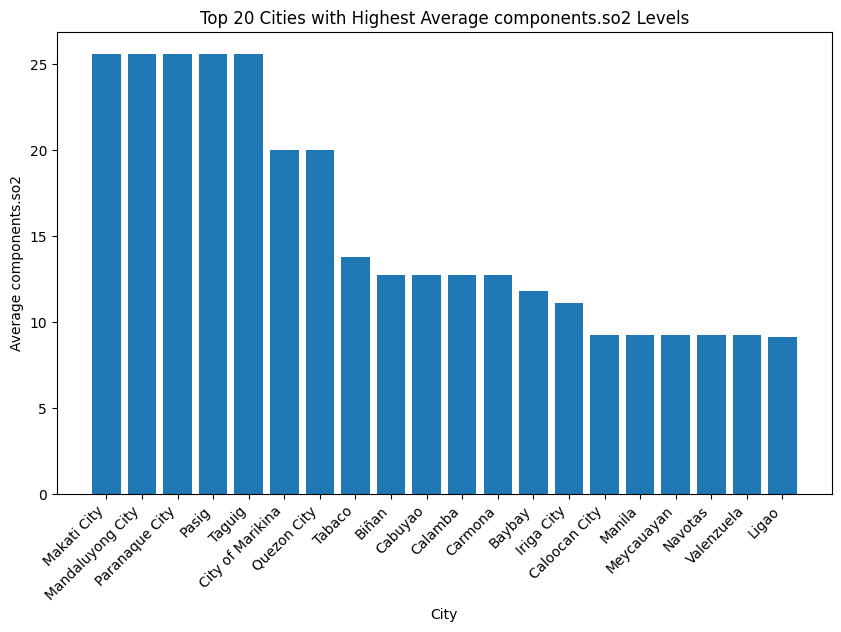

In [182]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_SO2= 'components.so2'

# Group data by city and calculate the average pollutant level
average_SO2 = df.groupby('city_name')[pollutant_SO2].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_SO2.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_SO2}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_SO2} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

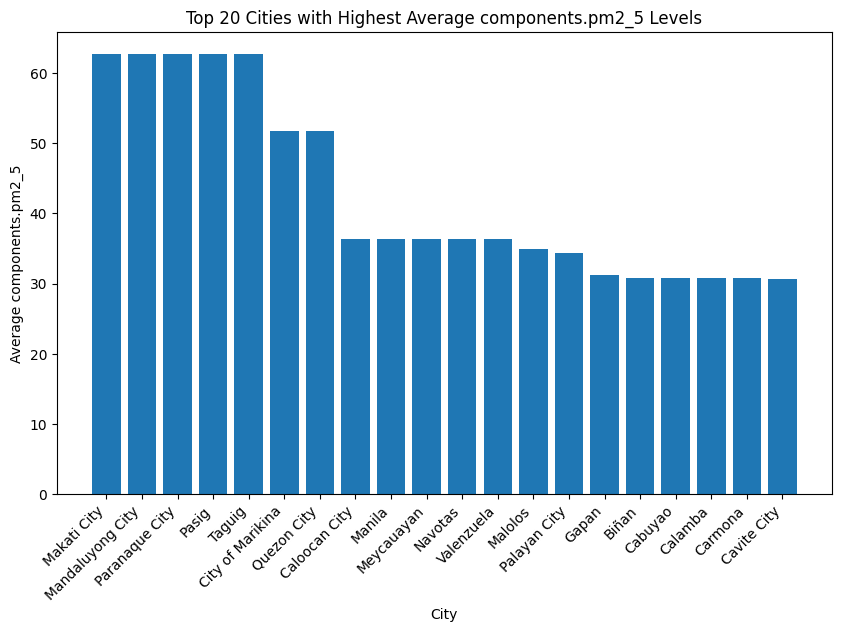

In [183]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_PM2_5= 'components.pm2_5'

# Group data by city and calculate the average pollutant level
average_PM2_5 = df.groupby('city_name')[pollutant_PM2_5].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_PM2_5.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM2_5}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_PM2_5} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

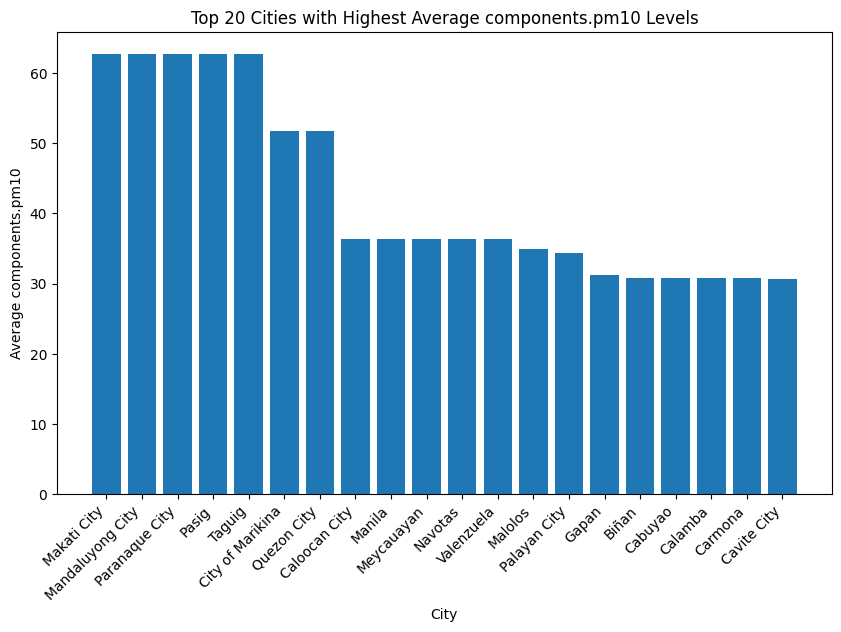

In [184]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_PM10= 'components.pm10'

# Group data by city and calculate the average pollutant level
average_PM10 = df.groupby('city_name')[pollutant_PM10].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_PM2_5.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_PM10}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_PM10} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()

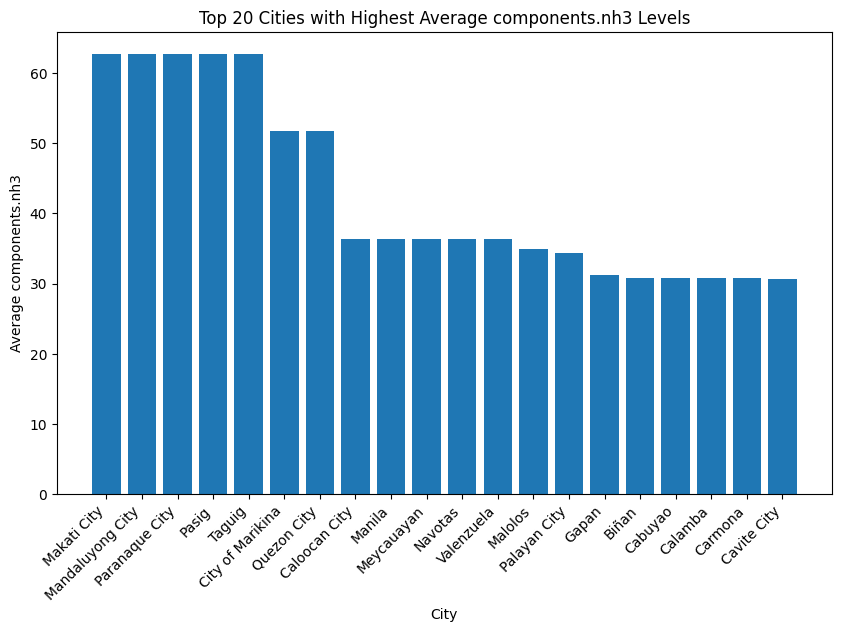

In [185]:
# Select the desired pollutant (e.g., 'components.pm2_5') and convert 'datetime' to datetime type
pollutant_NH3= 'components.nh3'

# Group data by city and calculate the average pollutant level
average_NH3 = df.groupby('city_name')[pollutant_NH3].mean()

# Plot the average pollutant levels for each city
top_20_cities = average_PM2_5.nlargest(20)

# Plot the top 20 cities with the highest average PM2.5 levels
plt.figure(figsize=(10, 6))
plt.bar(top_20_cities.index, top_20_cities.values)
plt.xlabel('City')
plt.ylabel(f'Average {pollutant_NH3}')
plt.title(f'Top 20 Cities with Highest Average {pollutant_NH3} Levels')
plt.xticks(rotation=45, ha='right')
plt.show()